In [3]:
#Import du data set et des libs

from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
#chargement du jeu de donnees
wine_dataframe = pd.read_csv('modified_datatest.csv', index_col=0)
print(len(wine_dataframe))
wine_dataframe = wine_dataframe.drop('URLS', axis=1)
wine_dataframe = wine_dataframe.drop('Tranquille to Mousseux', axis=1)
wine_dataframe = wine_dataframe.drop('Cépages', axis=1)

wine_dataframe['Léger to Puissant'] = wine_dataframe['Léger to Puissant'].str.replace(';', '')
wine_dataframe['Souple to Tannique'] = wine_dataframe['Souple to Tannique'].str.replace(';', '')
wine_dataframe['Sec to Moelleux'] = wine_dataframe['Sec to Moelleux'].str.replace(';', '')
wine_dataframe['Doux to Acide'] = wine_dataframe['Doux to Acide'].str.replace(';', '')
wine_dataframe['Léger to Puissant'] = wine_dataframe['Léger to Puissant'].astype(float)
wine_dataframe['Souple to Tannique'] = wine_dataframe['Souple to Tannique'].astype(float)
wine_dataframe['Sec to Moelleux'] = wine_dataframe['Sec to Moelleux'].astype(float)
wine_dataframe['Doux to Acide'] = wine_dataframe['Doux to Acide'].astype(float)

35218


In [5]:
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.replace('/+', '+')
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.replace(',+', '+')
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.replace('/+', '+')
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.replace(',+', '+')
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.replace('Ã©', 'é')
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.replace('Ã‰', 'é')
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.replace('Ã©', 'é')
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.replace('Ã‰', 'é')
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.lower()
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.lower()
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.lstrip('+')
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.lstrip('+')
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.split('+')
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.split('+')

wine_dataframe['Aromas'] = wine_dataframe['Aromas'].apply(lambda x: [] if isinstance(x, float) else x)
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].apply(lambda x: [] if isinstance(x, float) else x)
print(wine_dataframe.describe())

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


       Léger to Puissant  Souple to Tannique  Sec to Moelleux  Doux to Acide  \
count       35218.000000        35218.000000     35218.000000   35218.000000   
mean           39.965001           19.491293        19.386413      37.882006   
std            29.311771           23.718340        15.306354      28.274971   
min             0.000000            0.000000         0.000000       0.000000   
25%             0.000000            0.000000         0.000000       0.000000   
50%            51.000000            0.000000        23.578555      50.105424   
75%            63.804147           40.940347        30.224412      59.500000   
max            85.000000           85.000000        85.000000      85.000000   

                Red  
count  35218.000000  
mean       0.676813  
std        0.467700  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        1.000000  


In [7]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
Aromas_one_hot_encoded = mlb.fit_transform(wine_dataframe['Aromas'])
Aromas_df_encoded = pd.DataFrame(Aromas_one_hot_encoded, columns=mlb.classes_)
Olphactive_one_hot_encoded = mlb.fit_transform(wine_dataframe['Olphactive'])
Olphactive_df_encoded = pd.DataFrame(Olphactive_one_hot_encoded, columns=mlb.classes_)
df_concatenated_0 = pd.concat([wine_dataframe, Aromas_df_encoded], axis=1)
df_concatenated = pd.concat([df_concatenated_0, Olphactive_df_encoded], axis=1)

df_concatenated.drop('Aromas', axis=1, inplace=True)
df_concatenated.drop('Olphactive', axis=1, inplace=True)



In [8]:
mask = (df_concatenated['Léger to Puissant'] != 0) | (df_concatenated['Souple to Tannique'] != 0) | (df_concatenated['Sec to Moelleux'] != 0) | (df_concatenated['Doux to Acide'] != 0)
df_concatenated = df_concatenated[mask]


In [9]:
from sklearn.model_selection import train_test_split
X = df_concatenated.drop('Red', axis=1)
y = df_concatenated['Red']
#X = X.values
#y = y.tolist()
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state=42)
print('X_train',len(X_train))
print('X_test',len(X_test))
print('y_train',len(y_train))
print('y_test',len(y_test))

X_train 21553
X_test 2395
y_train 21553
y_test 2395


In [19]:
df_concatenated['Red'].value_counts()

1    15495
0     8453
Name: Red, dtype: int64

# 2) PREDICT

In [15]:
classifier = SVC(C=150, kernel='rbf', degree=3, gamma='auto')
classifier.fit(X_train, y_train)
#Prediction sur le Test set
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       865
           1       1.00      0.99      0.99      1530

    accuracy                           0.99      2395
   macro avg       0.99      0.99      0.99      2395
weighted avg       0.99      0.99      0.99      2395



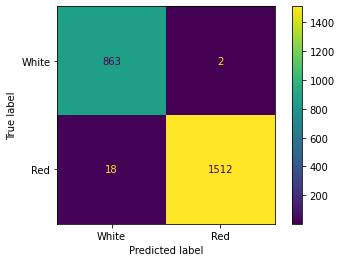

In [21]:
from sklearn import metrics
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=["White","Red"])
cm_display.plot(ax=ax)
plt.show()


In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svm_model = SVC()
param_grid = {'C': [100, 150, 200], 'kernel': ['rbf'], 'gamma': ['auto']}

In [13]:
grid_search = GridSearchCV(svm_model, param_grid, cv=3, verbose = 4, scoring='accuracy')
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END .....C=100, gamma=auto, kernel=rbf;, score=0.992 total time=   6.4s
[CV 2/3] END .....C=100, gamma=auto, kernel=rbf;, score=0.993 total time=   6.1s
[CV 3/3] END .....C=100, gamma=auto, kernel=rbf;, score=0.993 total time=   6.5s
[CV 1/3] END .....C=150, gamma=auto, kernel=rbf;, score=0.992 total time=   6.3s
[CV 2/3] END .....C=150, gamma=auto, kernel=rbf;, score=0.993 total time=   6.3s
[CV 3/3] END .....C=150, gamma=auto, kernel=rbf;, score=0.994 total time=   6.4s
[CV 1/3] END .....C=200, gamma=auto, kernel=rbf;, score=0.992 total time=   6.2s
[CV 2/3] END .....C=200, gamma=auto, kernel=rbf;, score=0.993 total time=   6.4s
[CV 3/3] END .....C=200, gamma=auto, kernel=rbf;, score=0.993 total time=   6.6s


GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [100, 150, 200], 'gamma': ['auto'],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=4)

In [14]:
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'C': 150, 'gamma': 'auto', 'kernel': 'rbf'}
Best score:  0.9930868372149972
